# <center>CSE3024 Lab 7: HUBS AND AUTHORITY USING HITS ALGORITHM</center>
<h3 align="right">Faraz Suhail</h3> 
<h3 align="right">19BCE1525</h3> 

## Ques 1.	Compute the Hubs and authority weights for the following graph. Verify the consistency of results obtained with the Custom Implementation and inbuilt HITS Algorithm function using k=4.

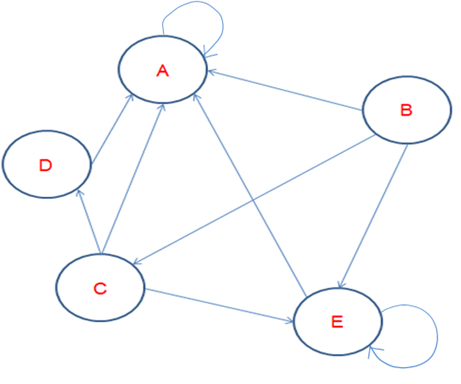

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

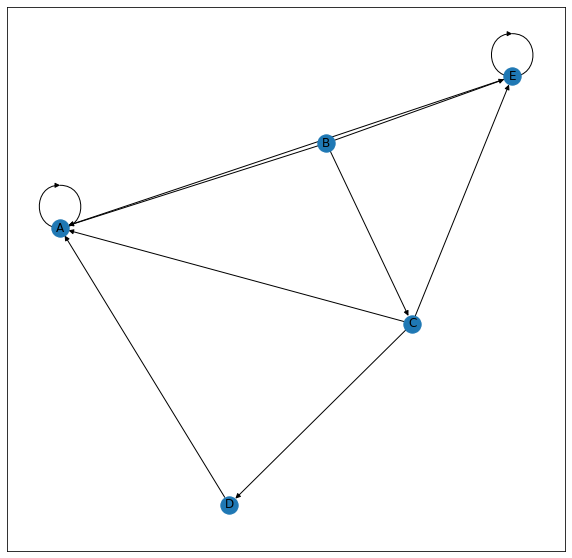

In [47]:
G = nx.DiGraph()
G.add_edges_from([('A', 'A'), ('B', 'A'), ('B', 'E'), ('B','C'), ('E', 'E'), ('E', 'A'), ('C', 'A'), ('C','D'),('C','E'),('D', 'A')])
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)

In [48]:
hubs, authorities = nx.hits(G, max_iter = 50, normalized = True)
print(" The Hub Scores are : ", hubs)
print("The Authority Scores are : ", authorities)

 The Hub Scores are :  {'A': 0.1291713066130293, 'B': 0.25834261322605867, 'E': 0.22497216032182418, 'C': 0.25834261322605867, 'D': 0.1291713066130293}
The Authority Scores are :  {'A': 0.4428026084897245, 'B': 0.0, 'E': 0.3284078254691739, 'C': 0.1143947830205508, 'D': 0.1143947830205508}


## Q2.	CUSTOM HITS ALGORITHM FUNCTION:

In [49]:
def hits(graph, iterations, tolarance=1.0e-8):
    hubs = dict.fromkeys(graph, 1.0 / graph.number_of_nodes())
    authorities = {}
    # power iteration, which stops after given iterations or reaching tolerance
    for _ in range(iterations):
        last_hubs = hubs
        hubs = dict.fromkeys(last_hubs.keys(), 0)
        authorities = dict.fromkeys(last_hubs.keys(), 0)
        for node in hubs:
            for neighbor in graph[node]:
                authorities[neighbor] += last_hubs[node] * graph[node][neighbor].get('weight', 1)
        for node in hubs:
            for neighbor in graph[node]:
                hubs[node] += authorities[neighbor] * graph[node][neighbor].get('weight', 1)
        scaling = 1.0 / max(hubs.values())
        for node in hubs:
            hubs[node] *= scaling
        scaling = 1.0 / max(authorities.values())
        for node in authorities:
            authorities[node] *= scaling
        err = sum([abs(hubs[node] - last_hubs[node]) for node in hubs])
        if err < tolarance:
            break
    return hubs, authorities

In [50]:
print(hits(G, 5))

({'A': 0.5000151354623884, 'B': 1.0, 'E': 0.8708339639775996, 'C': 1.0, 'D': 0.5000151354623884}, {'A': 1.0, 'B': 0.0, 'E': 0.7416152076522582, 'C': 0.25832425233079065, 'D': 0.25832425233079065})


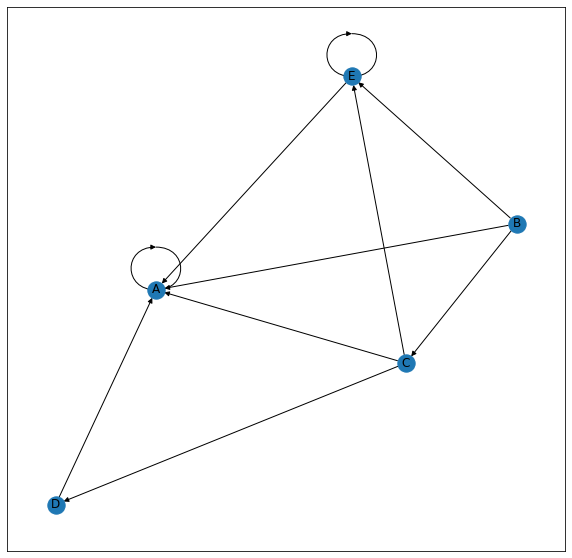

In [51]:
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True)